In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
pip install pyxlsb

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# reading data
data = pd.read_excel(r"C:\Users\madhu\Downloads\HR_Data.xlsb", engine='pyxlsb')


In [4]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [6]:
# checking shape of the data
data.shape

(14999, 10)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
# Statistical measures about the data
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
# # from above description we can see that the mean time spend in company by employees is 3.5(respective units) the max time spend in company by employees is 10.
# using mean and std we can conclude that 95% employees spend 0.578 to 6.4182 time in company.

# from satisfaction level column we can conclude that the average satisfaction level of employees is 0.612834 

# from number_project columnn we conclude that average number of project assign to employee is 3.8 ~ 4.The maximum no. of project assign to employee is 7 and minimum no. of
# project assign to employee is 1

In [10]:
data.duplicated().sum()

3008

In [11]:
# here total 3008 duplicates values are present in data. so we will remove them

In [12]:
data.drop_duplicates(subset = None , keep = 'first' , inplace = True , ignore_index = False)

In [13]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [14]:
# checking the left variable/column
data['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

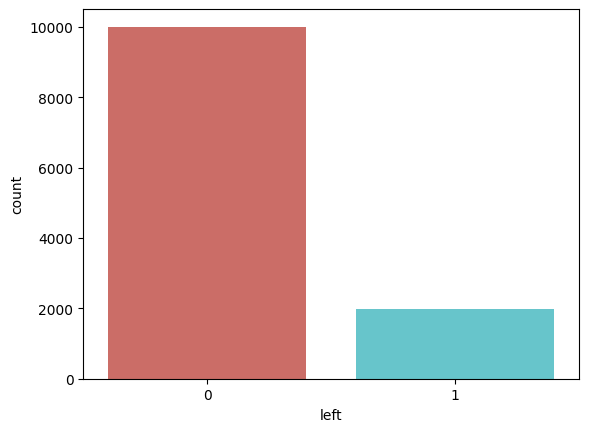

In [88]:
sns.countplot(x = 'left' , data = data , palette = 'hls')
plt.show()

In [16]:
data['salary'].value_counts()

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

In [17]:
# here there are 3 categories in salary section low , medium , high

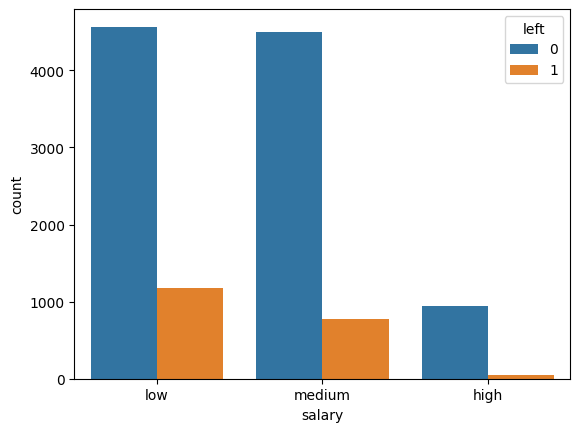

In [87]:
sns.countplot(x = 'salary' , hue = 'left' , data = data)
plt.show()

from above graph we can see that Highest Number of employees who leave the job are from low salary category followed by medium  salary category and lowest number of employees from high salary category.


In [19]:
# checking count of department
data['Department'].value_counts()

Department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

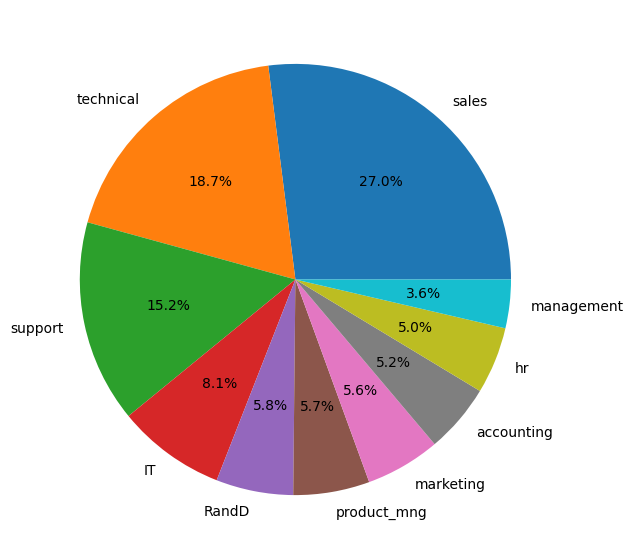

In [86]:
plt.figure(figsize = (12,7))
plt.pie(data['Department'].value_counts(), labels = data['Department'].value_counts().index, autopct='%1.1f%%');

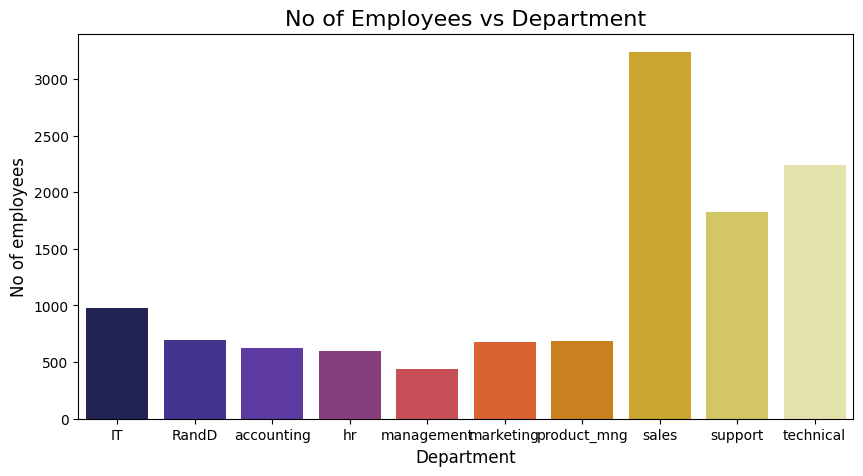

In [85]:
plt.figure(figsize = (10,5))
sns.countplot(x = data['Department'] , order = data['Department'].value_counts().index.sort_values(),palette='CMRmap')
plt.xlabel('Department',fontsize = 12)
plt.ylabel('No of employees' , fontsize = 12)
plt.title('No of Employees vs Department' , fontsize = 16)
plt.show()

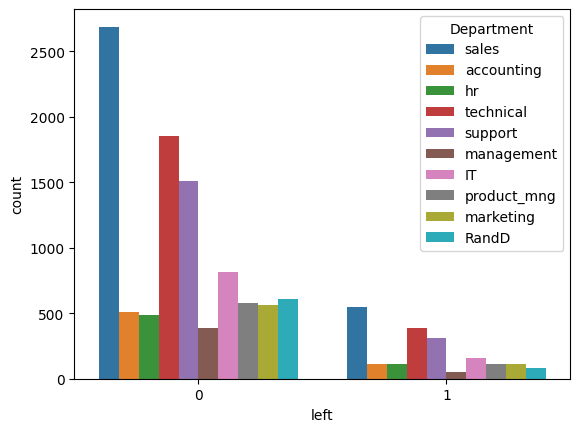

In [83]:
sns.countplot(x = 'left' , hue = 'Department' , data = data)
plt.show()

from above plot we can see that highest number of employees who left the  job are from Sales Department and lowest number of employees who left the job from management department

In [23]:
data['Work_accident'].value_counts()

Work_accident
0    10141
1     1850
Name: count, dtype: int64

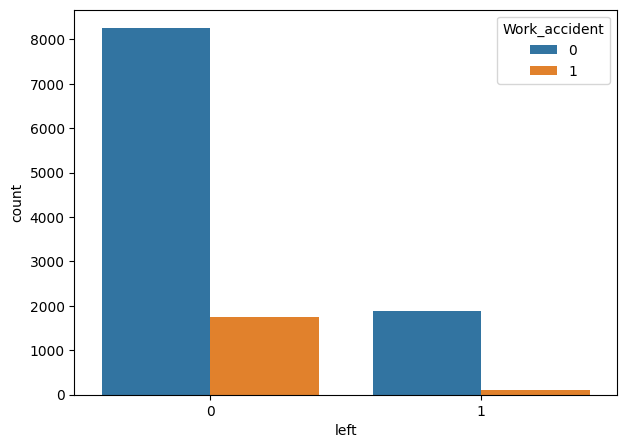

In [82]:
plt.figure(figsize = (7,5))
sns.countplot(x = 'left' , hue = 'Work_accident' , data = data)
plt.show()

here only few employees who have work_accident are left the job

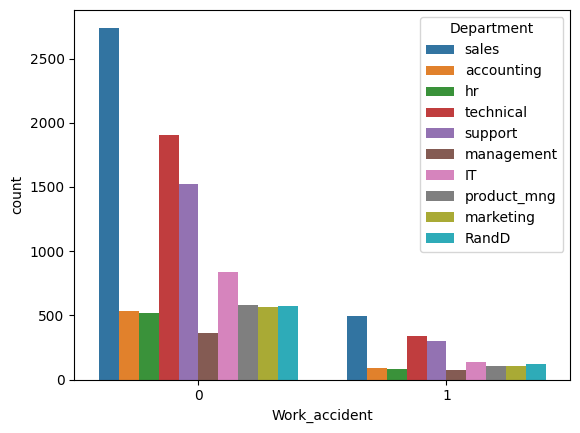

In [77]:
sns.countplot(x = 'Work_accident' , hue = 'Department' , data = data)
plt.show()

In sales department their are highest number of people have work accident and below that technical department 

In [26]:
data['time_spend_company'].value_counts()

time_spend_company
3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: count, dtype: int64

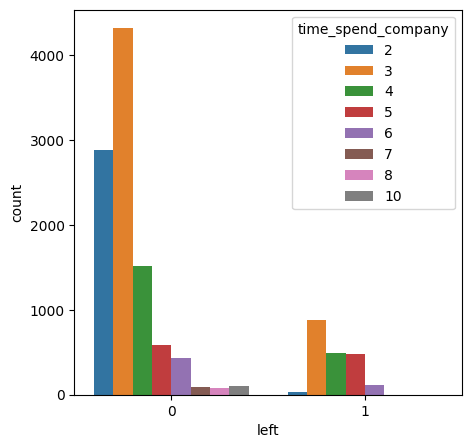

In [76]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'left', hue = 'time_spend_company' , data = data)
plt.show()

<Axes: xlabel='left', ylabel='count'>

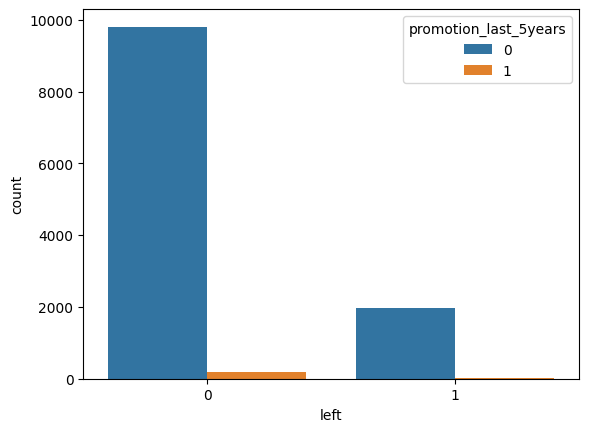

In [28]:
sns.countplot(x = 'left' , hue = 'promotion_last_5years' , data = data)

No one employee left the job who got promotion in last 5 years

In [29]:
# selecting independent variable
X = data.drop(['left'],axis = 1)
# selecting dependent variable
Y = data['left']

In [30]:
# Encoding object/categorical values
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = [('encoder' , OrdinalEncoder() , ['Department' , 'salary'])], remainder = 'passthrough')
X = ct.fit_transform(X)
X

array([[ 7.  ,  1.  ,  0.38, ...,  3.  ,  0.  ,  0.  ],
       [ 7.  ,  2.  ,  0.8 , ...,  6.  ,  0.  ,  0.  ],
       [ 7.  ,  2.  ,  0.11, ...,  4.  ,  0.  ,  0.  ],
       ...,
       [ 4.  ,  0.  ,  0.85, ..., 10.  ,  0.  ,  1.  ],
       [ 5.  ,  0.  ,  0.33, ..., 10.  ,  0.  ,  1.  ],
       [ 0.  ,  1.  ,  0.5 , ...,  3.  ,  0.  ,  0.  ]])

In [31]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [32]:
data['Department'].value_counts()

Department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

In [33]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Text(0.5, 1.0, 'satisfaction_lefvel log odds Linear Plot')

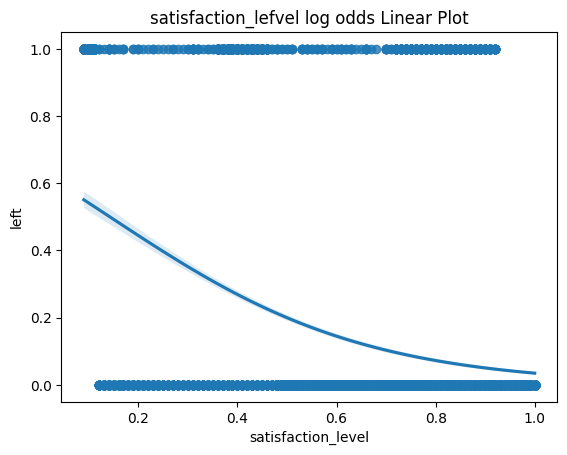

In [92]:
# Needed to run the Logistic Regression
import statsmodels.formula.api as smf

# for plotting/checking assumptions
statisfaction_level = sns.regplot(x = data['satisfaction_level'], y = data['left'], data = data , logistic = True).set_title("satisfaction_lefvel log odds Linear Plot")
statisfaction_level

In [36]:
# Spliting data in train and test
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , random_state = 1 , test_size = 0.2)

In [37]:
# Building Mondel on Train data 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# fit a model
lr.fit(X_train , Y_train)

# predicting Values using Test data
Y_pred = lr.predict(X_test)

In [38]:
# Acccuracy of train data
print(lr.score(X_train , Y_train))

0.8327773144286906


In [39]:
# Accuracy of test data
print(lr.score(X_test , Y_test))

0.826594414339308


In [40]:
# Calculating Performance Matrix
from sklearn.metrics import classification_report,roc_curve, confusion_matrix
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1985
           1       0.49      0.19      0.27       414

    accuracy                           0.83      2399
   macro avg       0.67      0.57      0.59      2399
weighted avg       0.79      0.83      0.79      2399



In [41]:
print(confusion_matrix(Y_test , Y_pred))

[[1905   80]
 [ 336   78]]


here our train accuracy is 83.19% and test accuracy is 0.8245% but there is problem in recall 0.18 and f1 score 0.27
because of our data is imbalance recall and f1 score is low 
so we can't say our model is best fit. 
we can hypertune our model to get more accuracy and more accurate predict.

In [43]:
# from above model we can't predict accuratly.

In [44]:
# Scaling our data

from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [45]:
# Importing neccessary libraries to split data into train test
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X_scaled , Y , test_size = 0.2 , random_state = 1, stratify = Y)

In [46]:
# importing model again
from sklearn.linear_model import LogisticRegression
# instantiate model
lr = LogisticRegression(solver='lbfgs',penalty='l2',)
# fit a model
lr.fit(X_train,Y_train)
# predicting using test data set
Y_pred=lr.predict(X_test)

In [47]:
# train data accuracy
print(lr.score(X_train , Y_train))

0.8313177648040033


In [48]:
print(lr.score(X_test , Y_test))

0.8395164651938307


In [49]:
# Checking performance measure for new model
print(classification_report(Y_test , Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2001
           1       0.54      0.21      0.30       398

    accuracy                           0.84      2399
   macro avg       0.70      0.59      0.61      2399
weighted avg       0.81      0.84      0.81      2399



In [50]:
# Printing Confusion Matrix
print(confusion_matrix(Y_test , Y_pred))

[[1930   71]
 [ 314   84]]


here our train accuracy is 83% but still there is a problem in recall 0.21% and F1 score is 0.30
because of our data is imbalance recall and f1 score is low 
we got some accuracy in updated model but it is not enough.
so we can't say our model is best fit. 

because of our data is imbalance recall and f1 score is low 
we got some accuracy in updated model but it is not enough.
so we can't say our model is best fit. 

In [53]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , random_state = 1 , test_size = 0.2)

In [54]:
# importing model
from sklearn.svm import SVC
# Instantiate model
svm = SVC()
# fit a model 
svm.fit(X_train , Y_train)
# Predicting using test data
Y_pred = svm.predict(X_test)

In [55]:
# Train accuracy
print(svm.score(X_train , Y_train))

# Test accuracy
print(svm.score(X_test, Y_test))

0.8355921601334445
0.8274280950395998


In [56]:
# checking performance measure for svm
print(classification_report(Y_test , Y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1985
           1       0.00      0.00      0.00       414

    accuracy                           0.83      2399
   macro avg       0.41      0.50      0.45      2399
weighted avg       0.68      0.83      0.75      2399



In [57]:
# printing confusion matrix
print(confusion_matrix(Y_test , Y_pred))

[[1985    0]
 [ 414    0]]


In [58]:
# here in SVM train accuracy is 83.55% and test accuracy is 82.74% . but precision , recall , and F1 score is 0.
# so this is not best fit model 
# It is nesaccary to hypertune the model parameter to get best fit model to predict more accuratly.

In [59]:
# fitting model on Scaled data or scaled input variable with stratification


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y,test_size=0.2,  random_state=1,stratify=Y)

In [61]:
# importing model
from sklearn.svm import SVC

# Instantiate Model
svm = SVC()

# fit a model
svm.fit(X_train , Y_train)

#predicting using test data
Y_pred = svm.predict(X_test)

In [62]:
# accuracy of train data
print(svm.score(X_train , Y_train))

# accuracy of test data
print(svm.score(X_test , Y_test))

0.9706005004170142
0.9704043351396415


In [63]:
# checking performance measure for svm
print(classification_report(Y_test , Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2001
           1       0.92      0.90      0.91       398

    accuracy                           0.97      2399
   macro avg       0.95      0.94      0.95      2399
weighted avg       0.97      0.97      0.97      2399



In [64]:
# printing confusion matrix
print(confusion_matrix(Y_test , Y_pred))

[[1968   33]
 [  38  360]]


In [65]:
# here our train accuracy is 97.04%  and test accuracy is 0.97% and  recall is 0.90 and f1 score is 0.98
# hence accuracy, f1 score anf recall are good enough
# we got some accuracy more in updated model but it is not enough.
# so we can say our model is best fit. 
# but we can still increase model accuracy using hyperparameter tunning

In [66]:
# hyperparamter tunning

# importing model
from sklearn.svm import SVC

# instantiate model 
# here probability  = true because we want to find probability cutoffs
sv=SVC(probability=True)
# importing model for validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

# list of parameter which are hypertunned
params = {'C':[0.5,0.6,0.7,0.8,0.9,1.0],
              'gamma': [1, 0.1],
              'kernel':['rbf']}

cv = StratifiedShuffleSplit(n_splits=10, test_size=0.20, random_state=1)
 
grid = GridSearchCV(SVC(), params, cv=cv)

grid.fit(X_train, Y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=1, test_size=0.2,
            train_size=None),
             estimator=SVC(),
             param_grid={'C': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'gamma': [1, 0.1],
                         'kernel': ['rbf']})

In [67]:
# Best model score or accuracy after hypertuning the model
print(grid.best_score_)

# Best model parameter or accuracy after hypertuning the model
print(grid.best_params_)

# Best model estimator or accuracy after hypertuning the model
print(grid.best_estimator_)

0.9721208963001564
{'C': 1.0, 'gamma': 1, 'kernel': 'rbf'}
SVC(gamma=1)
